# 1D Rayleigh-Sommerfeld Propagation

## Introduction

In this example, we analyze how to use diffractio.scalar_sources_X, scalar_fields_X and scalar_masks_X for propagating a field generated by a scalar light source that passes through one or several masks. We use Rayleigh-Sommerfeld propagation technique.

There is an extension for generating the field produced at a range of positions x from the mask using diffractio.scalar_fields_XZ. This extension is also used for Beam Propagation Method (XZ)

## Propagation of a plane wave through a slit
As a first example, let us consider a plane wave passing through a simple slit.
The technique is the following:

* Definition of light source at the plane of the mask $u_0(x)$
* Definition of mask $t(x)$
* Determination of light field after the mask $ t_1(x) = t(x) * u_0(x) $
* Propagation using Rayleigh-Sommerfed `RS` a certain distance z

In this example we also determine the Far Field intensity distribution using `FFT(x)`:

* Propagation using FFT at far field

In [1]:
%matplotlib inline

In [2]:
# import modules
from diffractio import degrees, mm, plt, sp, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

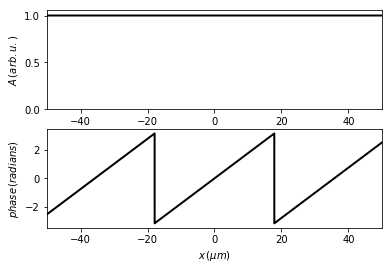

In [3]:
# Definition of input parameters
num_pixels = 4096*4
x0 = sp.linspace(-50*um, 50*um, num_pixels)
wavelength = 0.6238 * um

# definition of plane wave
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta=1 * degrees, z0=0 * um)
u0.draw(kind='field')


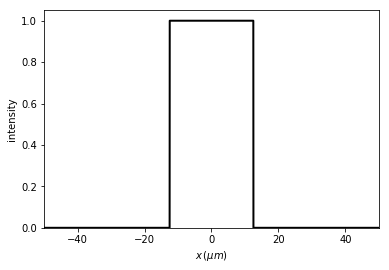

In [4]:
#Definition of mask
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.slit(x0=0, size=25 * um)
t1.draw()

('Good result: factor ', 114.10270627153895)
('Good result: factor ', 506.10796720292257)


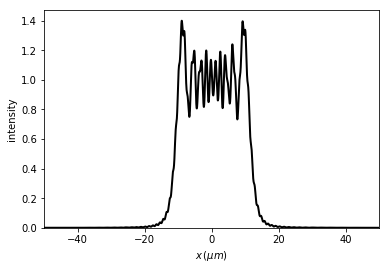

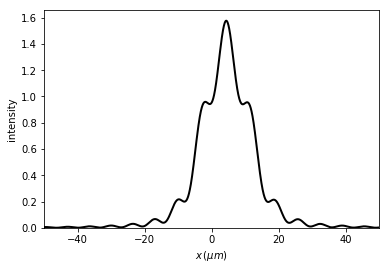

In [5]:
# Propagation a certain distance and draw
u2= u0*t1
u3 = u2.RS(z=25 * um, new_field=True, verbose=True)
u3.draw(kind='intensity')

u3 = u2.RS(z=250 * um, new_field=True, verbose=True)
u3.draw(kind='intensity')

## Far field propagation
When we have a given field, we can also determine the far field intensity distribution using `fft` function:

(0, 4282.76004315203)

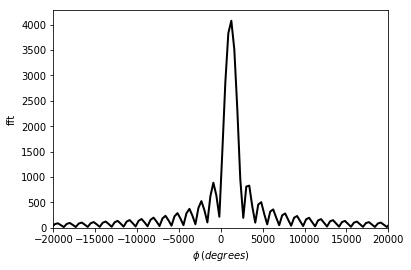

In [6]:
u3 = u2.fft(z=1*mm, remove0=False, new_field=True, shift=True)
u3.draw(kind='fft',logarithm=False)
plt.xlim(-20000,20000)
plt.ylim(bottom=0)